In [1]:
! wget http://www.hobieco.com/linked_images/H18-Magnum.jpg

--2015-12-03 13:44:27--  http://www.hobieco.com/linked_images/H18-Magnum.jpg
Resolving www.hobieco.com (www.hobieco.com)... 23.253.120.233
Connecting to www.hobieco.com (www.hobieco.com)|23.253.120.233|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://static.hobiecat.com/linked_images/H18-Magnum.jpg [following]
--2015-12-03 13:44:27--  http://static.hobiecat.com/linked_images/H18-Magnum.jpg
Resolving static.hobiecat.com (static.hobiecat.com)... 23.253.120.233
Reusing existing connection to www.hobieco.com:80.
HTTP request sent, awaiting response... 200 OK
Length: 73105 (71K) [image/jpeg]
Saving to: ‘H18-Magnum.jpg.1’

100%[======================================>] 73,105      82.1KB/s   in 0.9s   

2015-12-03 13:44:28 (82.1 KB/s) - ‘H18-Magnum.jpg.1’ saved [73105/73105]



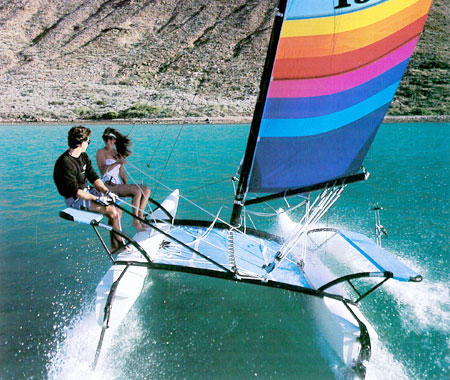

In [2]:
from IPython.display import Image 
Image(filename='H18-Magnum.jpg')

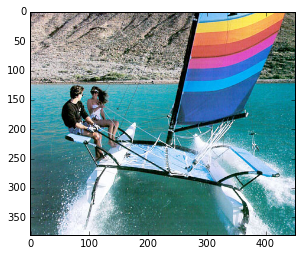

In [3]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('H18-Magnum.jpg', 'r')
imshow(np.asarray(pil_im))